# Part II - Data Exploration

This part follows "Part I: Data Visualization". 

In this part, we focus on the effect of salary on different ratings.

This part is organized as follow:

1. We will sketch a scatter plot to get a general view on the relationship between salary and ratings.
2. We will draw a heatmap to see relationships among all the ratings and salary.
3. We will use different algorithms to cluster on different salaries and ratings.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
# loading data 
df = pd.read_csv('FinalData.csv')

## Scatter plot

In this part we use the smaller dataset to visualize, or it would be too many points and hard to read.

In [33]:
td = pd.read_csv('TestData.csv')

In [37]:
td.groupby('sectorName')['overallRating'].describe()

,count,mean,std,min,25%,50%,75%,max
sectorName,,,,,,,,
Accounting & Legal,29.0,3.634483,9.232226e-01,0.0,3.600,3.80,4.100,5.0
Aerospace & Defense,3.0,4.100000,0.000000e+00,4.1,4.100,4.10,4.100,4.1
"Arts, Entertainment & Recreation",8.0,3.750000,7.464200e-01,3.0,3.000,3.80,4.050,4.8
Biotech & Pharmaceuticals,13.0,3.823077,5.309643e-01,2.3,3.500,4.00,4.100,4.2
Business Services,93.0,3.864516,6.714108e-01,2.0,3.500,3.90,4.300,5.0
"Construction, Repair & Maintenance",12.0,3.358333,1.029085e+00,1.9,2.875,3.30,4.075,4.6
Consumer Services,9.0,4.366667,2.000000e-01,4.1,4.100,4.50,4.500,4.5
Education,21.0,3.928571,3.273268e-01,3.4,3.600,4.00,4.300,4.3
Finance,45.0,3.540000,6.372526e-01,2.3,2.900,3.90,4.000,4.4


In [34]:
an_salary_td = td[td['payPeriod'] == 'ANNUAL']
an_salary_td = an_salary_td.dropna(axis=0,subset=['mean','overallRating'])
an_salary_td = an_salary_td.loc[an_salary_td['overallRating']>0]
an_salary_td = an_salary_td.loc[an_salary_td['careerOpportunitiesRating']>0]
an_salary_td = an_salary_td.loc[an_salary_td['compensationAndBenefitsRating']>0]
an_salary_td = an_salary_td.loc[an_salary_td['cultureAndValuesRating']>0]
an_salary_td = an_salary_td.loc[an_salary_td['seniorLeadershipRating']>0]
an_salary_td = an_salary_td.loc[an_salary_td['workLifeBalanceRating']>0]

In [35]:
an_salary_td.columns

Index(['employmentStatus', 'jobTitle', 'max', 'mean', 'min', 'payPeriod',
       'company_name', 'totalJobTitlesCount', 'careerOpportunitiesRating',
       'compensationAndBenefitsRating', 'cultureAndValuesRating',
       'industryName', 'isEEP', 'numberOfRatings', 'overallRating',
       'ratingDescription', 'recommendToFriendRating', 'sectorName',
       'seniorLeadershipRating', 'workLifeBalanceRating', 'review_URL',
       'review_ID', 'review_currentJob', 'review_DateTime', 'review_jobTitle',
       'review_location', 'review_pros', 'review_cons', 'review_overall',
       'ceo_name', 'ceo_title', 'ceo_numberOfRatings', 'ceo_approval_rate',
       'ceo_Photo_URL', 'parentEmployer_name', 'parentEmployer_ID',
       'parentEmployer_logoURL'],
      dtype='object')

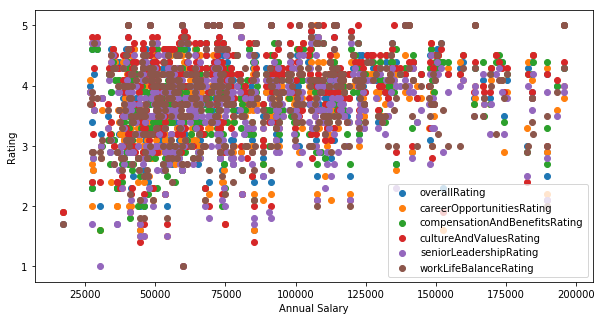

In [36]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(an_salary_td['mean'],an_salary_td['overallRating']) 
ax.scatter(an_salary_td['mean'],an_salary_td['careerOpportunitiesRating']) 
ax.scatter(an_salary_td['mean'],an_salary_td['compensationAndBenefitsRating']) 
ax.scatter(an_salary_td['mean'],an_salary_td['cultureAndValuesRating']) 
ax.scatter(an_salary_td['mean'],an_salary_td['seniorLeadershipRating']) 
ax.scatter(an_salary_td['mean'],an_salary_td['workLifeBalanceRating']) 
plt.xlabel('Annual Salary')
plt.ylabel('Rating')
plt.legend()  
plt.show()

From the scatter plot above, we can draw a conclusion that salary has no decisive influence on rating because it is apparent that there is no linear relation between them. What is more, there are obvious individual differences on the rating to the companies. Some individuals who have relatively high salary are still unsatisfied with their companies.

## Heatmap

In [38]:
df1 = df.copy()

We select mean of salary as the target variable to validate

In [39]:
del df1['max']
del df1['min']

Since the payperiod indicates salary payroll is inconsistant, we need to convert all payperiod into "Annual" for consistancy

In [40]:
df1['payPeriod'].unique()

array(['ANNUAL', 'HOURLY', 'MONTHLY'], dtype=object)

In [41]:
df_hour = df1[df1['payPeriod'] == 'HOURLY']
df_month = df1[df1['payPeriod'] == 'MONTHLY']
df_year = df1[df1['payPeriod'] == 'ANNUAL']

In [42]:
#  We assume that employees who has hourly payperiod with 40 hours working hours each week. Totally, 52 weeks per year
# Annual salary = Hourly salary * 40 * 52

df_hour['mean'] = df_hour['mean'] * 40 * 52

# Same for Monthly, Annual salary = Monthly salary * 12

df_month['mean'] = df_month['mean'] * 12

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
df_hour_month = pd.concat([df_hour, df_month])
df_salary_annual = pd.concat([df_hour_month, df_year])

In [44]:
df_salary_annual = df_salary_annual.sort_index()
df_salary_annual.rename(columns={'mean':'Salary_Annual'}, inplace=True)
del df_salary_annual['payPeriod']

In [45]:
df_salary_annual.head()

,employmentStatus,jobTitle,Salary_Annual,company_name,totalJobTitlesCount,careerOpportunitiesRating,compensationAndBenefitsRating,cultureAndValuesRating,industryName,isEEP,numberOfRatings,overallRating,ratingDescription,recommendToFriendRating,sectorName,seniorLeadershipRating,workLifeBalanceRating
0,REGULAR,Cyber Security Consultant,130255.78,Accenture,1,3.7,3.4,3.9,Consulting,True,52510,3.8,Satisfied,78,Business Services,3.2,3.5
1,REGULAR,Data Scientist Consultant,112439.25,Accenture,1,3.7,3.4,3.9,Consulting,True,52510,3.8,Satisfied,78,Business Services,3.2,3.5
2,REGULAR,Technical Support Analyst,55190.95,Accenture,3,3.7,3.4,3.9,Consulting,True,52510,3.8,Satisfied,78,Business Services,3.2,3.5
3,REGULAR,Technical Support Analyst,41392.00,Accenture,3,3.7,3.4,3.9,Consulting,True,52510,3.8,Satisfied,78,Business Services,3.2,3.5
4,CONTRACT,Technical Support Analyst,40227.20,Accenture,3,3.7,3.4,3.9,Consulting,True,52510,3.8,Satisfied,78,Business Services,3.2,3.5


In [46]:
# drop variables which has no impact on salary from plotting variables above
df_salary_annual.drop(['totalJobTitlesCount', 'isEEP','numberOfRatings','recommendToFriendRating'], axis=1, inplace=True)

In [47]:
df_salary_annual.head()

,employmentStatus,jobTitle,Salary_Annual,company_name,careerOpportunitiesRating,compensationAndBenefitsRating,cultureAndValuesRating,industryName,overallRating,ratingDescription,sectorName,seniorLeadershipRating,workLifeBalanceRating
0,REGULAR,Cyber Security Consultant,130255.78,Accenture,3.7,3.4,3.9,Consulting,3.8,Satisfied,Business Services,3.2,3.5
1,REGULAR,Data Scientist Consultant,112439.25,Accenture,3.7,3.4,3.9,Consulting,3.8,Satisfied,Business Services,3.2,3.5
2,REGULAR,Technical Support Analyst,55190.95,Accenture,3.7,3.4,3.9,Consulting,3.8,Satisfied,Business Services,3.2,3.5
3,REGULAR,Technical Support Analyst,41392.00,Accenture,3.7,3.4,3.9,Consulting,3.8,Satisfied,Business Services,3.2,3.5
4,CONTRACT,Technical Support Analyst,40227.20,Accenture,3.7,3.4,3.9,Consulting,3.8,Satisfied,Business Services,3.2,3.5


In [48]:
df_salary_annual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22337 entries, 0 to 22336
Data columns (total 13 columns):
employmentStatus                 22337 non-null object
jobTitle                         22337 non-null object
Salary_Annual                    22337 non-null float64
company_name                     22337 non-null object
careerOpportunitiesRating        22337 non-null float64
compensationAndBenefitsRating    22337 non-null float64
cultureAndValuesRating           22337 non-null float64
industryName                     20212 non-null object
overallRating                    22337 non-null float64
ratingDescription                22337 non-null object
sectorName                       20212 non-null object
seniorLeadershipRating           22337 non-null float64
workLifeBalanceRating            22337 non-null float64
dtypes: float64(7), object(6)
memory usage: 2.4+ MB


In [49]:
df_salary_annual['employmentStatus'] = df_salary_annual['employmentStatus'].astype('category')
df_salary_annual['jobTitle'] = df_salary_annual['jobTitle'].astype('category')
df_salary_annual['company_name'] = df_salary_annual['company_name'].astype('category')
df_salary_annual['industryName'] = df_salary_annual['industryName'].astype('category')
df_salary_annual['ratingDescription'] = df_salary_annual['ratingDescription'].astype('category')
df_salary_annual['sectorName'] = df_salary_annual['sectorName'].astype('category')

In [50]:
def encode_label(df, col):
    # encode the categories using average salary for each category to replace label
    cat_dict = {}
    cats = df_salary_annual[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = df_salary_annual[df_salary_annual[col] == cat]['Salary_Annual'].mean()
    df_salary_annual[col] = df_salary_annual[col].map(cat_dict)

In [51]:
for col in df_salary_annual.columns:
    if df_salary_annual[col].dtype.name == 'category':
        encode_label(df_salary_annual, col)

In [52]:
df_salary_annual.head()

,employmentStatus,jobTitle,Salary_Annual,company_name,careerOpportunitiesRating,compensationAndBenefitsRating,cultureAndValuesRating,industryName,overallRating,ratingDescription,sectorName,seniorLeadershipRating,workLifeBalanceRating
0,89990.702751,103211.488889,130255.78,98532.054022,3.7,3.4,3.9,90058.724671,3.8,92655.3874,75508.98734,3.2,3.5
1,89990.702751,112439.250000,112439.25,98532.054022,3.7,3.4,3.9,90058.724671,3.8,92655.3874,75508.98734,3.2,3.5
2,89990.702751,55530.383333,55190.95,98532.054022,3.7,3.4,3.9,90058.724671,3.8,92655.3874,75508.98734,3.2,3.5
3,89990.702751,55530.383333,41392.00,98532.054022,3.7,3.4,3.9,90058.724671,3.8,92655.3874,75508.98734,3.2,3.5
4,94302.620820,55530.383333,40227.20,98532.054022,3.7,3.4,3.9,90058.724671,3.8,92655.3874,75508.98734,3.2,3.5


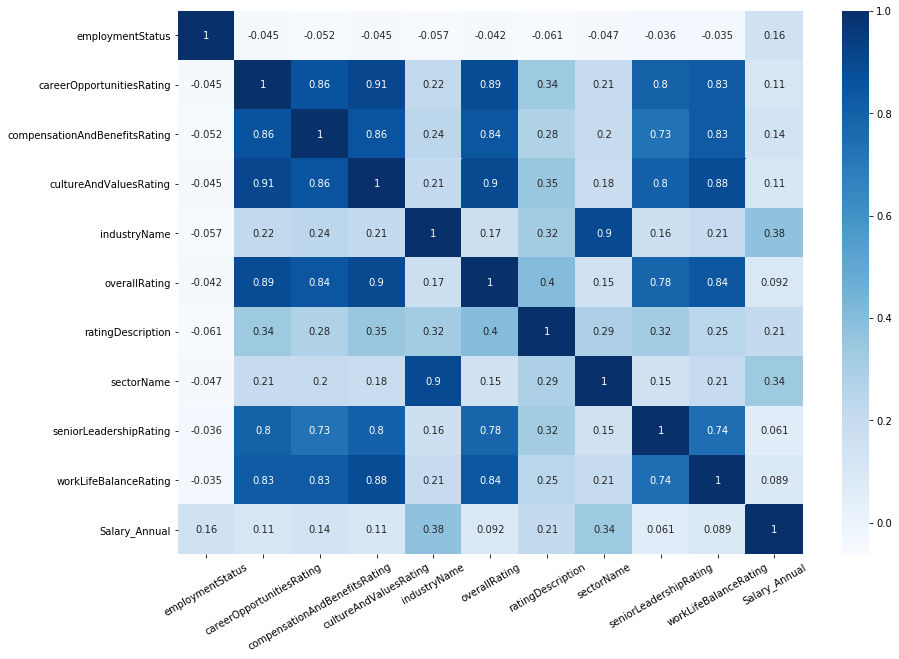

In [53]:
# Correlations between selected features and response
# jobId is excluded which is unique for each record

fig = plt.figure(figsize = (14,10))
features = ['employmentStatus', 'careerOpportunitiesRating', 'compensationAndBenefitsRating', 'cultureAndValuesRating', 
            'industryName','overallRating', 'ratingDescription','sectorName','seniorLeadershipRating','workLifeBalanceRating']
sns.heatmap(df_salary_annual[features + ['Salary_Annual']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=30)
plt.show()

## Data Clustering

We use 3 algorithms to cluster data: 
1. K-means
2. DBSCAN
3. Hierarchical Clustering

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### 1. K-means

In [57]:
from sklearn.cluster import KMeans 

Normalize dataset:

In [58]:
# Save all values in the df as 
X = df_salary_annual.values
X = np.nan_to_num(X)
K_mean_df_stand = StandardScaler().fit_transform(X)
K_mean_df_stand

array([[ 0.20656511,  0.37707297,  0.9384904 , ..., -0.17640411,
         0.15685552,  0.03075404],
       [ 0.20656511,  0.61427352,  0.53764533, ..., -0.17640411,
         0.15685552,  0.03075404],
       [ 0.20656511, -0.84857477, -0.75035516, ..., -0.17640411,
         0.15685552,  0.03075404],
       ...,
       [ 0.20656511, -0.20668707, -0.18090367, ..., -0.17640411,
         1.07513145,  1.13164037],
       [ 0.20656511, -1.07993462, -1.1960962 , ..., -0.17640411,
         1.07513145,  1.13164037],
       [ 0.20656511, -1.82079727, -1.875177  , ..., -0.882545  ,
        -3.51624819, -4.25047057]])

Modeling

In [59]:
clusterNum = 6
k_means = KMeans(init="k-means++", n_clusters=clusterNum, n_init= 12)
k_means.fit(X)
Kmean_labels = k_means.labels_
print(Kmean_labels)

[1 1 2 ... 0 0 0]


Insights

In [60]:
df_salary_annual['Cluster_Kmean'] = Kmean_labels
df_salary_annual.head(5)

,employmentStatus,jobTitle,Salary_Annual,company_name,careerOpportunitiesRating,compensationAndBenefitsRating,cultureAndValuesRating,industryName,overallRating,ratingDescription,sectorName,seniorLeadershipRating,workLifeBalanceRating,Cluster_Kmean
0,89990.702751,103211.488889,130255.78,98532.054022,3.7,3.4,3.9,90058.724671,3.8,92655.3874,75508.98734,3.2,3.5,1
1,89990.702751,112439.250000,112439.25,98532.054022,3.7,3.4,3.9,90058.724671,3.8,92655.3874,75508.98734,3.2,3.5,1
2,89990.702751,55530.383333,55190.95,98532.054022,3.7,3.4,3.9,90058.724671,3.8,92655.3874,75508.98734,3.2,3.5,2
3,89990.702751,55530.383333,41392.00,98532.054022,3.7,3.4,3.9,90058.724671,3.8,92655.3874,75508.98734,3.2,3.5,2
4,94302.620820,55530.383333,40227.20,98532.054022,3.7,3.4,3.9,90058.724671,3.8,92655.3874,75508.98734,3.2,3.5,2


We can also check the centriod for each clusters(Now we have 5 clusters):

In [61]:
df_salary_annual.groupby('Cluster_Kmean').mean()

,employmentStatus,jobTitle,Salary_Annual,company_name,careerOpportunitiesRating,compensationAndBenefitsRating,cultureAndValuesRating,industryName,overallRating,ratingDescription,sectorName,seniorLeadershipRating,workLifeBalanceRating
Cluster_Kmean,,,,,,,,,,,,,
0,88327.487389,46976.225967,42015.785069,52037.128667,3.086807,3.151955,3.287475,68030.073142,3.355446,83607.075983,72107.001646,2.994975,3.267896
1,89469.864158,108910.619469,111700.051935,101113.323222,3.465924,3.582808,3.646959,94802.012187,3.650022,90211.684009,93897.147960,3.221208,3.600044
2,87101.962832,70828.617775,67331.228167,91402.474772,3.440226,3.541658,3.610346,93304.113889,3.621372,89041.139271,92418.675766,3.201129,3.583418
3,90264.503365,155421.075601,167528.867816,111988.942719,3.458583,3.618148,3.654691,97516.351256,3.647644,91432.552998,95786.002972,3.227694,3.587587
4,89202.583397,115539.262594,118113.063115,104639.039501,2.793646,2.967187,3.047500,NaN,3.111146,90507.633473,NaN,1.855208,3.010000
5,88245.838410,56016.497179,50123.531429,62084.509412,2.742943,2.858262,2.933477,31073.809389,3.084423,85236.647047,42993.279385,2.207573,2.960929


Take a look at distribution of each job based on jobTitle and Salary_Annual 

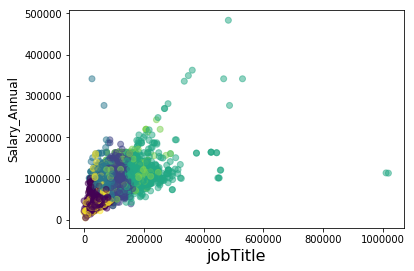

In [62]:
plt.scatter(X[:, 2], X[:, 3], c=Kmean_labels.astype(np.float), alpha=0.5)
plt.xlabel('jobTitle', fontsize=16)
plt.ylabel('Salary_Annual', fontsize=12)

plt.show()

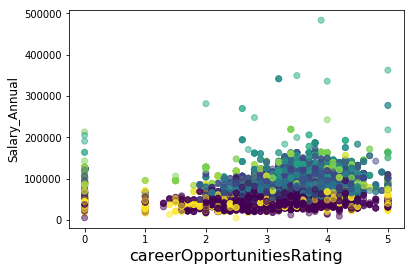

In [63]:
plt.scatter(X[:, 5], X[:, 3], c=Kmean_labels.astype(np.float), alpha=0.5)
plt.xlabel('careerOpportunitiesRating', fontsize=16)
plt.ylabel('Salary_Annual', fontsize=12)

plt.show()

After running a small number of clustering group, we can see the clustering is not very convincible by showing the graph above. Thus, a more precise clustering method is required. 

### 2. DBSCAN

In [72]:
from sklearn.cluster import DBSCAN 
import sklearn.utils
sklearn.utils.check_random_state(1000)

In [73]:
df_salary_annual.columns

Index(['employmentStatus', 'jobTitle', 'Salary_Annual', 'company_name',
       'careerOpportunitiesRating', 'compensationAndBenefitsRating',
       'cultureAndValuesRating', 'industryName', 'overallRating',
       'ratingDescription', 'sectorName', 'seniorLeadershipRating',
       'workLifeBalanceRating', 'Cluster_Kmean', 'Cluster_DBscan'],
      dtype='object')

In [74]:
DBscan_df = df_salary_annual[['employmentStatus', 'jobTitle', 'Salary_Annual', 'company_name',
       'careerOpportunitiesRating', 'compensationAndBenefitsRating',
       'cultureAndValuesRating', 'industryName', 'overallRating',
       'ratingDescription', 'sectorName', 'seniorLeadershipRating',
       'workLifeBalanceRating']]
DBscan_df = np.nan_to_num(DBscan_df)
DBscan_df = StandardScaler().fit_transform(DBscan_df)

In [75]:
DB = DBSCAN(eps=0.15, min_samples=10).fit(DBscan_df)
labels_DBscan = DB.labels_
df_salary_annual["Cluster_DBscan"]=labels_DBscan

realClusterNum=len(set(labels_DBscan)) - (1 if -1 in labels_DBscan else 0)
clusterNum_DB = len(set(labels_DBscan)) 

In [76]:
clusterNum_DB

135

In [77]:
df_salary_annual.head()

,employmentStatus,jobTitle,Salary_Annual,company_name,careerOpportunitiesRating,compensationAndBenefitsRating,cultureAndValuesRating,industryName,overallRating,ratingDescription,sectorName,seniorLeadershipRating,workLifeBalanceRating,Cluster_Kmean,Cluster_DBscan
0,91103.804131,100317.812727,130255.78,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,2,-1
1,91103.804131,112439.250000,112439.25,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,2,-1
2,91103.804131,54583.446818,55190.95,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,4,-1
3,91103.804131,54583.446818,41392.00,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,4,-1
4,94709.594106,54583.446818,40227.20,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,4,-1


### 3. Hierarchical Clustering

In [79]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 

Data cleaning

In [80]:
df_salary_annual.isnull().sum()

employmentStatus                    0
jobTitle                            0
Salary_Annual                       0
company_name                        0
careerOpportunitiesRating           0
compensationAndBenefitsRating       0
cultureAndValuesRating              0
industryName                     2718
overallRating                       0
ratingDescription                   0
sectorName                       2718
seniorLeadershipRating              0
workLifeBalanceRating               0
Cluster_Kmean                       0
Cluster_DBscan                      0
dtype: int64

In [81]:
print ("Shape of dataset before cleaning: ", df_salary_annual.size)
df_salary_annual[['employmentStatus', 'jobTitle', 'Salary_Annual', 'company_name',
       'careerOpportunitiesRating', 'compensationAndBenefitsRating',
       'cultureAndValuesRating', 'industryName', 'overallRating',
       'ratingDescription', 'sectorName', 'seniorLeadershipRating',
       'workLifeBalanceRating']].apply(pd.to_numeric, errors='coerce')
df_salary_annual_dropna = df_salary_annual.dropna()
df_salary_annual_dropna = df_salary_annual_dropna.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df_salary_annual_dropna.size)
df_salary_annual_dropna.head(5)

Shape of dataset before cleaning:  421005
Shape of dataset after cleaning:  380235


,employmentStatus,jobTitle,Salary_Annual,company_name,careerOpportunitiesRating,compensationAndBenefitsRating,cultureAndValuesRating,industryName,overallRating,ratingDescription,sectorName,seniorLeadershipRating,workLifeBalanceRating,Cluster_Kmean,Cluster_DBscan
0,91103.804131,100317.812727,130255.78,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,2,-1
1,91103.804131,112439.250000,112439.25,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,2,-1
2,91103.804131,54583.446818,55190.95,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,4,-1
3,91103.804131,54583.446818,41392.00,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,4,-1
4,94709.594106,54583.446818,40227.20,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,4,-1


In [82]:
features = df_salary_annual_dropna[['Salary_Annual','careerOpportunitiesRating','compensationAndBenefitsRating',
                                   'cultureAndValuesRating','overallRating','seniorLeadershipRating','workLifeBalanceRating']]

Data Normalization

In [83]:
from sklearn.preprocessing import MinMaxScaler
x = features.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.1278558 , 0.74      , 0.68      , 0.78      , 0.76      ,
        0.64      , 0.7       ],
       [0.11036755, 0.74      , 0.68      , 0.78      , 0.76      ,
        0.64      , 0.7       ],
       [0.05417405, 0.74      , 0.68      , 0.78      , 0.76      ,
        0.64      , 0.7       ],
       [0.04062935, 0.74      , 0.68      , 0.78      , 0.76      ,
        0.64      , 0.7       ],
       [0.03948601, 0.74      , 0.68      , 0.78      , 0.76      ,
        0.64      , 0.7       ]])

Hierarchical Clustering

In [84]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.01748826 0.07368175 ... 0.25374219 0.26584387 1.76370889]
 [0.01748826 0.         0.05619349 ... 0.25096369 0.26023352 1.76257803]
 [0.07368175 0.05619349 0.         ... 0.25023437 0.24975625 1.76011599]
 ...
 [0.25374219 0.25096369 0.25023437 ... 0.         0.0442913  1.94932397]
 [0.26584387 0.26023352 0.24975625 ... 0.0442913  0.         1.94814727]
 [1.76370889 1.76257803 1.76011599 ... 1.94932397 1.94814727 0.        ]]


In [85]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [87]:
df_salary_annual_dropna['Cluster_Hierarchy'] = agglom.labels_
df_salary_annual_dropna.head()

,employmentStatus,jobTitle,Salary_Annual,company_name,careerOpportunitiesRating,compensationAndBenefitsRating,cultureAndValuesRating,industryName,overallRating,ratingDescription,sectorName,seniorLeadershipRating,workLifeBalanceRating,Cluster_Kmean,Cluster_DBscan,Cluster_Hierarchy
0,91103.804131,100317.812727,130255.78,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,2,-1,1
1,91103.804131,112439.250000,112439.25,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,2,-1,1
2,91103.804131,54583.446818,55190.95,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,4,-1,1
3,91103.804131,54583.446818,41392.00,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,4,-1,1
4,94709.594106,54583.446818,40227.20,98532.054022,3.7,3.4,3.9,89127.064249,3.8,93421.187631,75860.002093,3.2,3.5,4,-1,1
